# Importing and Cleaning

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#reference new csv
file="../clean_data.csv"
df=pd.read_csv(file)

df=df.drop(columns="Unnamed: 0")


In [3]:
df.head()

,Title,Director,Movie Length (s),Genre,Headlining Actor,Gross,Keywords,Language,Country,Rating,Budget,Release Year,IMDB Score,Director Facebook Likes,Headlining Actor Facebook Likes,Movie Facebook Likes,Cast Facebook Likes
0,Avatar,James Cameron,178,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,760505847,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000,2009,7.9,0,1000,33000,4834
1,Pirates of the Caribbean: At World's End,Gore Verbinski,169,Action|Adventure|Fantasy,Johnny Depp,309404152,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,300000000,2007,7.1,563,40000,0,48350
2,Spectre,Sam Mendes,148,Action|Adventure|Thriller,Christoph Waltz,200074175,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13,245000000,2015,6.8,0,11000,85000,11700
3,The Dark Knight Rises,Christopher Nolan,164,Action|Thriller,Tom Hardy,448130642,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13,250000000,2012,8.5,22000,27000,164000,106759
4,John Carter,Andrew Stanton,132,Action|Adventure|Sci-Fi,Daryl Sabara,73058679,alien|american civil war|male nipple|mars|prin...,English,USA,PG-13,263700000,2012,6.6,475,640,24000,1873


In [4]:
#play

fresh_df=df[["Director", "Title", "Movie Length (s)", "Release Year"]]
fresh_df.head()

,Director,Title,Movie Length (s),Release Year
0,James Cameron,Avatar,178,2009
1,Gore Verbinski,Pirates of the Caribbean: At World's End,169,2007
2,Sam Mendes,Spectre,148,2015
3,Christopher Nolan,The Dark Knight Rises,164,2012
4,Andrew Stanton,John Carter,132,2012


In [5]:
fresh_df.set_index("Director").sort_index().head(5)

,Title,Movie Length (s),Release Year
Director,,,
Aaron Schneider,Get Low,100,2009
Aaron Seltzer,Date Movie,85,2006
Abel Ferrara,The Funeral,99,1996
Adam Goldberg,I Love Your Work,111,2003
Adam Marcus,Jason Goes to Hell: The Final Friday,91,1993


In [6]:
# fresh_df.sort_values(by=["Release Year"])

#Find directors that appear the most
fresh_df.groupby("Director").count().head(5)

,Title,Movie Length (s),Release Year
Director,,,
Aaron Schneider,1,1,1
Aaron Seltzer,1,1,1
Abel Ferrara,1,1,1
Adam Goldberg,1,1,1
Adam Marcus,1,1,1


In [7]:
#remove directors that only occur once
fresh_df = fresh_df.loc[fresh_df.duplicated(subset='Director', keep=False), :]

fresh_df.groupby("Release Year").count().tail(20)

,Director,Title,Movie Length (s)
Release Year,,,
1997,84,84,84
1998,86,86,86
1999,114,114,114
2000,120,120,120
2001,134,134,134
2002,154,154,154
2003,114,114,114
2004,140,140,140
2005,139,139,139


In [8]:
#I believe this code is grabbing the 10 most common directors from list

n=10
fresh_df["Director"].value_counts()[:n].index.tolist()

['Steven Spielberg',
 'Clint Eastwood',
 'Woody Allen',
 'Ridley Scott',
 'Tim Burton',
 'Martin Scorsese',
 'Steven Soderbergh',
 'Spike Lee',
 'Renny Harlin',
 'Robert Rodriguez']

In [9]:
top_10_df=fresh_df[(fresh_df["Director"] =='Steven Spielberg')|(fresh_df["Director"] =='Clint Eastwood')|
                   (fresh_df["Director"] =='Woody Allen')|(fresh_df["Director"] =='Ridley Scott')|
                   (fresh_df["Director"] =='Martin Scorsese')|(fresh_df["Director"] =='Tim Burton')|
                   (fresh_df["Director"] =='Steven Soderbergh')|(fresh_df["Director"] =='Renny Harlin')|
                   (fresh_df["Director"] =='Spike Lee')|(fresh_df["Director"] =='Robert Zemeckis')]

top_10_df

,Director,Title,Movie Length (s),Release Year
21,Ridley Scott,Robin Hood,156,2010
32,Tim Burton,Alice in Wonderland,108,2010
53,Steven Spielberg,Indiana Jones and the Kingdom of the Crystal S...,122,2008
59,Robert Zemeckis,A Christmas Carol,96,2009
68,Martin Scorsese,Hugo,126,2011
...,...,...,...,...
3470,Spike Lee,Get on the Bus,120,1996
3500,Steven Soderbergh,Full Frontal,101,2002
3581,Steven Soderbergh,"Sex, Lies, and Videotape",100,1989
3774,Steven Soderbergh,Side Effects,106,2013


In [10]:
#remove Movie Length (s)
top_10_df=top_10_df[["Director", "Title", "Release Year"]]
top_10_df

,Director,Title,Release Year
21,Ridley Scott,Robin Hood,2010
32,Tim Burton,Alice in Wonderland,2010
53,Steven Spielberg,Indiana Jones and the Kingdom of the Crystal S...,2008
59,Robert Zemeckis,A Christmas Carol,2009
68,Martin Scorsese,Hugo,2011
...,...,...,...
3470,Spike Lee,Get on the Bus,1996
3500,Steven Soderbergh,Full Frontal,2002
3581,Steven Soderbergh,"Sex, Lies, and Videotape",1989
3774,Steven Soderbergh,Side Effects,2013


In [11]:
#remove directors that do not have multiple releases in one year
repeats_df=top_10_df[top_10_df.duplicated(subset=["Director", "Release Year"], keep=False)]
repeats_df=repeats_df.sort_values(by="Release Year")
repeats_df

,Director,Title,Release Year
984,Renny Harlin,The Adventures of Ford Fairlane,1990
566,Renny Harlin,Die Hard 2,1990
666,Steven Spielberg,Jurassic Park,1993
1745,Steven Spielberg,Schindler's List,1993
3470,Spike Lee,Get on the Bus,1996
2689,Spike Lee,Girl 6,1996
1381,Clint Eastwood,Midnight in the Garden of Good and Evil,1997
1182,Steven Spielberg,Amistad,1997
925,Clint Eastwood,Absolute Power,1997
501,Steven Spielberg,The Lost World: Jurassic Park,1997


In [12]:
#remove duplicated entries
repeats_df.loc[repeats_df.duplicated(), :]
repeats_df.drop_duplicates(inplace=True)
repeats_df=repeats_df[repeats_df["Director"]!= 'Ridley Scott']
repeats_df

,Director,Title,Release Year
984,Renny Harlin,The Adventures of Ford Fairlane,1990
566,Renny Harlin,Die Hard 2,1990
666,Steven Spielberg,Jurassic Park,1993
1745,Steven Spielberg,Schindler's List,1993
3470,Spike Lee,Get on the Bus,1996
2689,Spike Lee,Girl 6,1996
1381,Clint Eastwood,Midnight in the Garden of Good and Evil,1997
1182,Steven Spielberg,Amistad,1997
925,Clint Eastwood,Absolute Power,1997
501,Steven Spielberg,The Lost World: Jurassic Park,1997


In [13]:
#Create graph data dataframe
graph_data_df=repeats_df.groupby(["Director", "Release Year"]).count()
graph_data_df=graph_data_df.rename(columns={"Title":'Titles Released in Single Year'})
graph_data_df

Titles Released in Single Year
Director          Release Year                                
Clint Eastwood    1997                                       2
                  2006                                       2
                  2008                                       2
                  2014                                       2
Renny Harlin      1990                                       2
                  2004                                       2
Robert Zemeckis   2000                                       2
Spike Lee         1996                                       2
                  2000                                       2
Steven Soderbergh 2000                                       2
                  2011                                       2
                  2013                                       1
Steven Spielberg  1993                                       2
                  1997                                       2
                  2002                                       2
                  2005                                       2
                  2011                                       2
Tim Burton        2001                                       1
                  2005                                       2
                  2010                                       1
                  2012                                       2

# 1990-2014: Multiple Movies Released by Single Directors

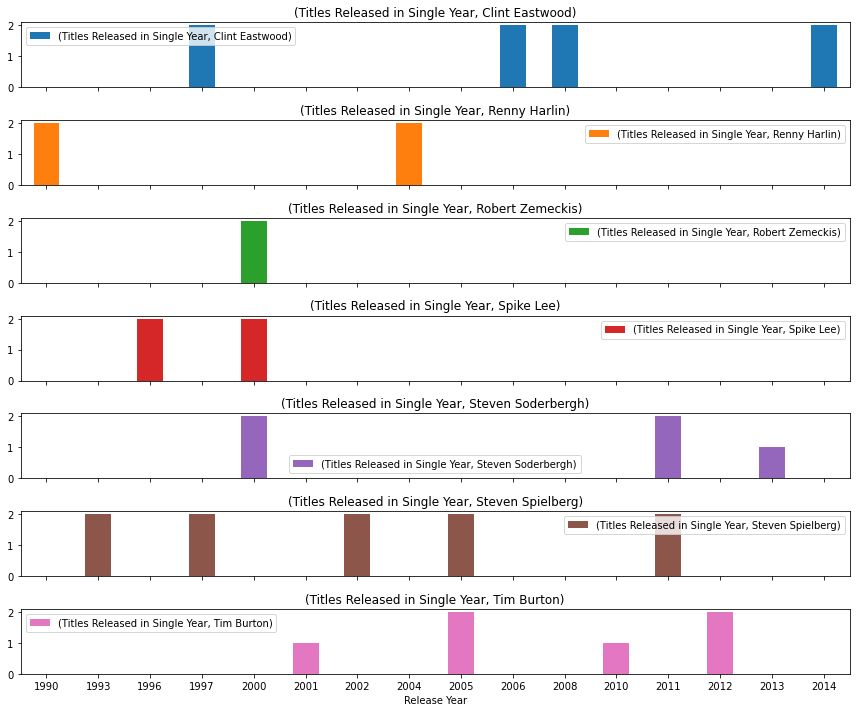

In [14]:
ax = graph_data_df.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(12, 10))
plt.tight_layout()
plt.savefig("../Images/Busy_Directors.png")

In [15]:
repeats_df

,Director,Title,Release Year
984,Renny Harlin,The Adventures of Ford Fairlane,1990
566,Renny Harlin,Die Hard 2,1990
666,Steven Spielberg,Jurassic Park,1993
1745,Steven Spielberg,Schindler's List,1993
3470,Spike Lee,Get on the Bus,1996
2689,Spike Lee,Girl 6,1996
1381,Clint Eastwood,Midnight in the Garden of Good and Evil,1997
1182,Steven Spielberg,Amistad,1997
925,Clint Eastwood,Absolute Power,1997
501,Steven Spielberg,The Lost World: Jurassic Park,1997
